In [1]:
# Random Forest 

In [2]:
import pandas as pd
#Dataframe
df =pd.read_csv('../final_cleaned.csv')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

     
# Créez un modèle Random Forest et ajustez-le sur l'ensemble d'entraînement
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
    
# Prédisez sur les ensembles d'entraînement et de validation
y_pred_train = rf_model.predict(X_train)
y_pred_validation = rf_model.predict(X_validation)
  


In [5]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score


# Calcul des métriques sur l'ensemble de validation
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
auc_validation = roc_auc_score(y_validation, y_pred_validation)

# Affichage des métriques sur l'ensemble de validation
print("Métriques sur l'ensemble de validation:")
print(f"Accuracy: {accuracy_validation:.2f}")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1-Score: {f1_validation:.2f}")
print(f"auc-Score: {auc_validation:.2f}")


Métriques sur l'ensemble de validation:
Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1-Score: 0.99
auc-Score: 0.99


In [6]:
# Prédiction sur l'ensemble de test

y_pred_test = rf_model.predict(X_test)

# Calcul des métriques sur l'ensemble de test

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred_test)


randfor_results = pd.DataFrame([['Random forest', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
randfor_results.to_csv('../evaluations/randfor_results.csv', index=False)

randfor_results


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random forest,0.98661,0.976689,0.996949,0.986715,0.986635


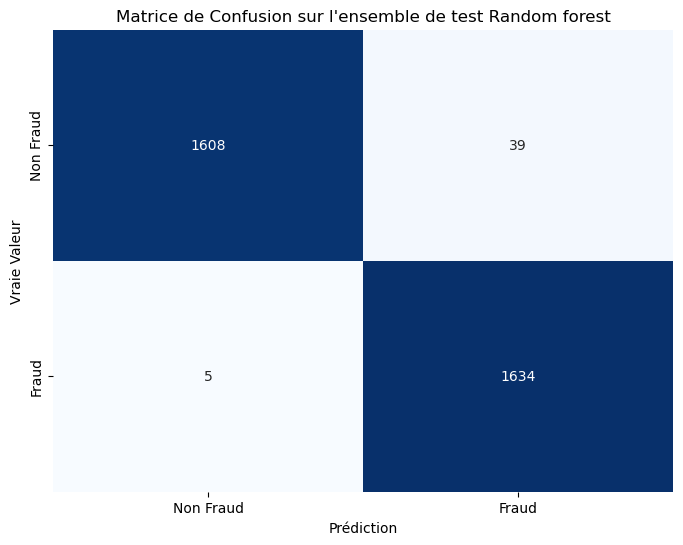

In [7]:

# Matrice de confusion sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non Fraud', 'Fraud'],
            yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion sur l\'ensemble de test Random forest')
plt.show()


In [8]:
#combien de sous arbres sont construits ,'' ici par défaut ''
n_estimators_used = rf_model.n_estimators
print(f"Nombre d'estimateurs utilisés : {n_estimators_used}")


Nombre d'estimateurs utilisés : 100


In [9]:
#la profondeur maximale de l'arbre
max_tree_depth = max([estimator.tree_.max_depth for estimator in rf_model.estimators_])
print(f"Profondeur maximale des arbres : {max_tree_depth}")


Profondeur maximale des arbres : 37


In [10]:

# Accédez aux arbres individuels de la forêt
individual_trees = rf_model.estimators_

# Affichez le nombre de données dans chaque arbre
for i, tree in enumerate(individual_trees):
    n_samples_in_tree = tree.tree_.n_node_samples
#     print(f"Arbre {i + 1} - Nombre de données : {n_samples_in_tree}")


In [11]:
# Accédez au nombre d'estimateurs utilisés (nombre d'arbres)
n_estimators_used = rf_model.n_estimators
print(f"Nombre d'estimateurs utilisés : {n_estimators_used}")

# Obtenez la taille de votre ensemble de données
n_samples_total = len(X_train)

# Calculez le nombre moyen d'échantillons dans chaque arbre
n_samples_in_each_tree = n_samples_total / n_estimators_used
print(f"Nombre moyen d'échantillons dans chaque arbre : {n_samples_in_each_tree}")


Nombre d'estimateurs utilisés : 100
Nombre moyen d'échantillons dans chaque arbre : 105.12
